In [1]:
import os
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Load the Wikipedia pages

In [2]:
# function to convert a webpage in txt format into a sequence of stemmed tokens, stored as list in a dictionary

def load_wikipages(directory):
    """
    load webpages from a given directoy path and tokenize+stem each page and stores it in a dicionary.
    - input: directory
    - returns: dictionary containing the tokenized webpages
    """

    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()

    # initialize dictionary
    docs = {}
    doc_id=1
    # iterate over files in that directory
    for filename in sorted(os.listdir(directory), key=lambda x: int(x.split(')')[0])):
        f = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(f):
            with open(f, 'r', encoding='utf-8') as d:
                url = d.readline().strip()
                title = d.readline().strip()
                doc = d.read()
            word_tokens = nltk.word_tokenize(doc)
            tokens_swremoved = [w for w in word_tokens if w.lower() not in stop_words]
            tokens_stemmed = [stemmer.stem(w) for w in tokens_swremoved]
            tokens_puncremoved = [token for token in tokens_stemmed if token not in punctuation]
            docs[(f'd{doc_id}',url,title)] = tokens_puncremoved   
            doc_id += 1
    
    return docs
            
directory = "[your working directory]/Pre-Processing/Raw_TXT_Downloads"
docs = load_wikipages(directory)

### Create WordCloud

In [3]:
def tokens_to_string(list_of_docs):
    '''generate string from content of all webpages (docs)
    input: list of docs, where each doc comprises a list of tokens
    output: string with tokens of all webpages'''

    text = []
    for d in list_of_docs:
        text.extend(d)
  
    return ' '.join(text)

text_string = tokens_to_string(docs.values())

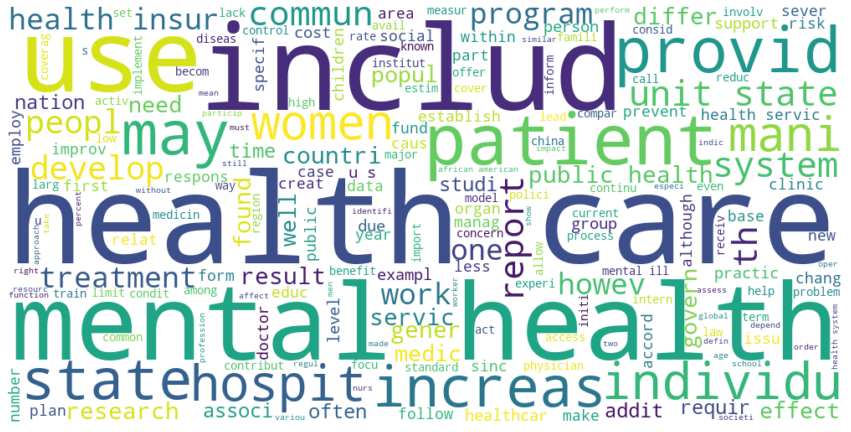

In [4]:
wc = WordCloud(background_color="white", max_font_size=150, width=1000, height=500)
wc.generate(text_string)

plt.figure(figsize=(15,10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()